In [1]:
import pyspark as spark
import numpy as np
import pandas as pd
import sklearn
import geopandas as gpd 
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crash = pd.read_csv('../data/Traffic_Crashes_-_Crashes.csv')

In [3]:
crash.shape

(517282, 49)

In [4]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517282 entries, 0 to 517281
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                517282 non-null  object 
 1   RD_NO                          512571 non-null  object 
 2   CRASH_DATE_EST_I               39076 non-null   object 
 3   CRASH_DATE                     517282 non-null  object 
 4   POSTED_SPEED_LIMIT             517282 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         517282 non-null  object 
 6   DEVICE_CONDITION               517282 non-null  object 
 7   WEATHER_CONDITION              517282 non-null  object 
 8   LIGHTING_CONDITION             517282 non-null  object 
 9   FIRST_CRASH_TYPE               517282 non-null  object 
 10  TRAFFICWAY_TYPE                517282 non-null  object 
 11  LANE_CNT                       198966 non-null  float64
 12  ALIGNMENT                     

In [5]:
crash['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        229700
DIVIDED - W/MEDIAN (NOT RAISED)     90468
ONE-WAY                             68639
PARKING LOT                         36546
DIVIDED - W/MEDIAN BARRIER          30657
FOUR WAY                            18287
OTHER                               14623
ALLEY                                8500
UNKNOWN                              5601
CENTER TURN LANE                     4325
T-INTERSECTION                       3866
DRIVEWAY                             1791
RAMP                                 1619
UNKNOWN INTERSECTION TYPE            1086
FIVE POINT, OR MORE                   458
Y-INTERSECTION                        450
TRAFFIC ROUTE                         336
NOT REPORTED                          142
ROUNDABOUT                            120
L-INTERSECTION                         68
Name: TRAFFICWAY_TYPE, dtype: int64

In [6]:
crash['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     449039
NONINCAPACITATING INJURY     37381
REPORTED, NOT EVIDENT        20779
INCAPACITATING INJURY         8528
FATAL                          506
Name: MOST_SEVERE_INJURY, dtype: int64

In [7]:
crash['NUM_UNITS'].value_counts()

2     454176
1      28012
3      27909
4       5326
5       1250
6        373
7        135
8         51
9         27
10        10
11         5
12         3
14         2
15         1
16         1
18         1
Name: NUM_UNITS, dtype: int64

In [8]:
crash_clean = crash[['CRASH_RECORD_ID','CRASH_DATE','POSTED_SPEED_LIMIT','WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_DIRECTION','BEAT_OF_OCCURRENCE','WORK_ZONE_I','MOST_SEVERE_INJURY','INJURIES_TOTAL','INJURIES_FATAL','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','LATITUDE','LONGITUDE','LOCATION','TRAFFICWAY_TYPE','LANE_CNT']]

In [9]:
crash_clean

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,TRAFFICWAY_TYPE,LANE_CNT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),ONE-WAY,NaN
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),NOT DIVIDED,4.0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),FOUR WAY,NaN
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,30,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),DIVIDED - W/MEDIAN (NOT RAISED),NaN
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,20,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,14,4,7,NaN,NaN,NaN,DRIVEWAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517277,8177e1b192fa48f2031a46b96f36de00cf134a897106c7...,05/26/2021 03:29:00 PM,10,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,15,4,5,41.696314,-87.596632,POINT (-87.596632243933 41.696313683973),PARKING LOT,NaN
517278,b97a293c86c5720620b2c993ff91e46c90e129283ce883...,05/26/2021 08:54:00 PM,20,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,20,4,5,41.918463,-87.650799,POINT (-87.650799033359 41.918462595697),ALLEY,NaN
517279,c071056bc7969311010acb313722c4a2090c5be655b7ed...,05/26/2021 04:16:00 AM,20,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,4,4,5,41.778846,-87.686224,POINT (-87.686224330667 41.778846489565),ONE-WAY,NaN
517280,ce5ecae9555f96005905f51818101855eb30b626d49464...,05/26/2021 12:45:00 PM,30,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,12,4,5,41.784840,-87.664204,POINT (-87.664204193636 41.784840316339),T-INTERSECTION,NaN


In [10]:
crash['BEAT_OF_OCCURRENCE'].value_counts()

1834.0    6679
114.0     5426
1831.0    5165
122.0     5162
813.0     4985
          ... 
1125.0     492
1653.0     196
1652.0      82
1655.0      75
6100.0       1
Name: BEAT_OF_OCCURRENCE, Length: 275, dtype: int64

In [11]:
crash_clean.describe()

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LANE_CNT
count,517282.000000,517277.000000,516244.00000,516244.000000,517282.000000,517282.000000,517282.000000,514382.000000,514382.000000,1.989660e+05
mean,28.302120,1239.329638,0.17882,0.001060,13.242158,4.126892,6.573674,41.855046,-87.673046,1.333242e+01
std,6.444674,707.065267,0.55063,0.035331,5.506523,1.977442,3.438811,0.336088,0.683169,2.961921e+03
min,0.000000,111.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,-87.934763,0.000000e+00
25%,30.000000,712.000000,0.00000,0.000000,9.000000,2.000000,4.000000,41.782219,-87.721285,2.000000e+00
50%,30.000000,1211.000000,0.00000,0.000000,14.000000,4.000000,7.000000,41.875409,-87.673455,2.000000e+00
75%,30.000000,1822.000000,0.00000,0.000000,17.000000,6.000000,10.000000,41.924046,-87.632828,4.000000e+00
max,99.000000,6100.000000,21.00000,4.000000,23.000000,7.000000,12.000000,42.022780,0.000000,1.191625e+06


In [12]:
crash_clean.isnull().sum()

CRASH_RECORD_ID                 0
CRASH_DATE                      0
POSTED_SPEED_LIMIT              0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
STREET_DIRECTION                3
BEAT_OF_OCCURRENCE              5
WORK_ZONE_I                514004
MOST_SEVERE_INJURY           1049
INJURIES_TOTAL               1038
INJURIES_FATAL               1038
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     2900
LONGITUDE                    2900
LOCATION                     2900
TRAFFICWAY_TYPE                 0
LANE_CNT                   318316
dtype: int64

In [13]:
chimap= gpd.read_file('../data/Maps/geo_export_501125fe-60a6-4852-a5cf-5ef96eb419a9.shp')

In [14]:
geometry = [Point(xy) for xy in zip(crash.LONGITUDE,crash.LATITUDE)]

In [15]:
gdf = gpd.GeoDataFrame(crash,crs={'init':'epsg:4326'},geometry = geometry)

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

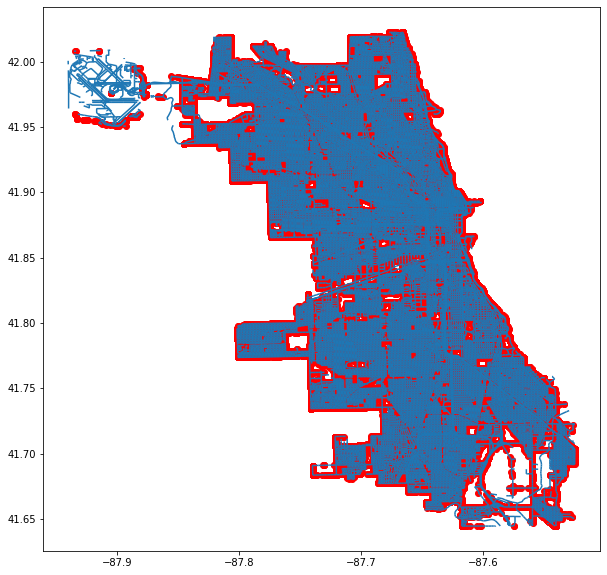

In [16]:
fig,axs=plt.subplots(figsize=(10,10))
ax1=chimap.plot(ax=axs)
ax1.set_xlim()
ax1.set_ylim()

gdf.plot(ax=ax1,color = 'red')

In [17]:
crash_clean['WEATHER_CONDITION'].value_counts()

CLEAR                       409531
RAIN                         45351
UNKNOWN                      22645
SNOW                         20310
CLOUDY/OVERCAST              15388
OTHER                         1616
FOG/SMOKE/HAZE                 837
SLEET/HAIL                     722
FREEZING RAIN/DRIZZLE          612
BLOWING SNOW                   166
SEVERE CROSS WIND GATE         102
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [18]:
crash_clean['ROAD_DEFECT'].value_counts()

NO DEFECTS           429237
UNKNOWN               76848
RUT, HOLES             4620
OTHER                  2920
WORN SURFACE           2110
SHOULDER DEFECT        1108
DEBRIS ON ROADWAY       439
Name: ROAD_DEFECT, dtype: int64

In [19]:
crash_clean['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  336395
DARKNESS, LIGHTED ROAD    111367
DARKNESS                   25869
UNKNOWN                    19015
DUSK                       15731
DAWN                        8905
Name: LIGHTING_CONDITION, dtype: int64

In [20]:
crash_clean['ROADWAY_SURFACE_COND'].value_counts()

DRY                386855
WET                 70089
UNKNOWN             34538
SNOW OR SLUSH       20426
ICE                  3928
OTHER                1223
SAND, MUD, DIRT       223
Name: ROADWAY_SURFACE_COND, dtype: int64

In [21]:
crash['INJURIES_INCAPACITATING'].value_counts()

0.0    507636
1.0      7547
2.0       786
3.0       190
4.0        66
5.0        15
6.0         3
7.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

In [22]:
crash['INJURIES_INCAPACITATING'].value_counts()

0.0    507636
1.0      7547
2.0       786
3.0       190
4.0        66
5.0        15
6.0         3
7.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

In [23]:
crash['DAMAGE'].value_counts()

OVER $1,500      302037
$501 - $1,500    149766
$500 OR LESS      65479
Name: DAMAGE, dtype: int64

In [24]:
crash_clean

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,TRAFFICWAY_TYPE,LANE_CNT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),ONE-WAY,NaN
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),NOT DIVIDED,4.0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),FOUR WAY,NaN
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,30,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),DIVIDED - W/MEDIAN (NOT RAISED),NaN
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,20,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,14,4,7,NaN,NaN,NaN,DRIVEWAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517277,8177e1b192fa48f2031a46b96f36de00cf134a897106c7...,05/26/2021 03:29:00 PM,10,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,15,4,5,41.696314,-87.596632,POINT (-87.596632243933 41.696313683973),PARKING LOT,NaN
517278,b97a293c86c5720620b2c993ff91e46c90e129283ce883...,05/26/2021 08:54:00 PM,20,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,20,4,5,41.918463,-87.650799,POINT (-87.650799033359 41.918462595697),ALLEY,NaN
517279,c071056bc7969311010acb313722c4a2090c5be655b7ed...,05/26/2021 04:16:00 AM,20,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,4,4,5,41.778846,-87.686224,POINT (-87.686224330667 41.778846489565),ONE-WAY,NaN
517280,ce5ecae9555f96005905f51818101855eb30b626d49464...,05/26/2021 12:45:00 PM,30,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,12,4,5,41.784840,-87.664204,POINT (-87.664204193636 41.784840316339),T-INTERSECTION,NaN


In [25]:
crash_clean["INJURIES_TOTAL"].value_counts()

0.0     449050
1.0      50774
2.0      11096
3.0       3356
4.0       1209
5.0        451
6.0        177
7.0         66
8.0         23
9.0         15
10.0         9
15.0         5
11.0         5
21.0         2
13.0         2
12.0         2
19.0         1
16.0         1
Name: INJURIES_TOTAL, dtype: int64

In [26]:
crash_clean["INJURIES_FATAL"].value_counts()

0.0    515738
1.0       472
2.0        28
3.0         5
4.0         1
Name: INJURIES_FATAL, dtype: int64

In [27]:
crash_clean.isnull().sum()

CRASH_RECORD_ID                 0
CRASH_DATE                      0
POSTED_SPEED_LIMIT              0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
STREET_DIRECTION                3
BEAT_OF_OCCURRENCE              5
WORK_ZONE_I                514004
MOST_SEVERE_INJURY           1049
INJURIES_TOTAL               1038
INJURIES_FATAL               1038
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     2900
LONGITUDE                    2900
LOCATION                     2900
TRAFFICWAY_TYPE                 0
LANE_CNT                   318316
dtype: int64

In [28]:
crash_clean['WORK_ZONE_I'] = crash_clean['WORK_ZONE_I'].fillna("N")

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/3014417222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['WORK_ZONE_I'] = crash_clean['WORK_ZONE_I'].fillna("N")


In [29]:
crash_clean['INJURIES_TOTAL'] = crash_clean['INJURIES_TOTAL'].fillna("UNKNOWN")

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/3936452071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['INJURIES_TOTAL'] = crash_clean['INJURIES_TOTAL'].fillna("UNKNOWN")


In [30]:
crash_clean['INJURIES_FATAL'] = crash_clean['INJURIES_FATAL'].fillna("UNKNOWN")

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/446342431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['INJURIES_FATAL'] = crash_clean['INJURIES_FATAL'].fillna("UNKNOWN")


In [31]:
crash_clean['MOST_SEVERE_INJURY'] = crash_clean['MOST_SEVERE_INJURY'].fillna("UNKNOWN")

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/1774345082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['MOST_SEVERE_INJURY'] = crash_clean['MOST_SEVERE_INJURY'].fillna("UNKNOWN")


In [32]:
crash_clean['BEAT_OF_OCCURRENCE'] = crash_clean['BEAT_OF_OCCURRENCE'].fillna("UNKNOWN")

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/2011030385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['BEAT_OF_OCCURRENCE'] = crash_clean['BEAT_OF_OCCURRENCE'].fillna("UNKNOWN")


In [33]:
crash_clean["LANE_CNT"].value_counts()

2.0          91136
4.0          49577
1.0          32544
3.0           8672
0.0           8030
6.0           4500
5.0           1939
8.0           1907
7.0            184
10.0           162
99.0           108
9.0             66
11.0            30
12.0            29
20.0            15
22.0            13
15.0             7
16.0             7
14.0             5
30.0             5
40.0             4
60.0             3
21.0             3
100.0            2
25.0             2
13.0             1
1191625.0        1
28.0             1
35.0             1
41.0             1
24.0             1
19.0             1
45.0             1
17.0             1
400.0            1
218474.0         1
299679.0         1
44.0             1
433634.0         1
80.0             1
902.0            1
Name: LANE_CNT, dtype: int64

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/803585571.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype = np.bool))


<AxesSubplot:>

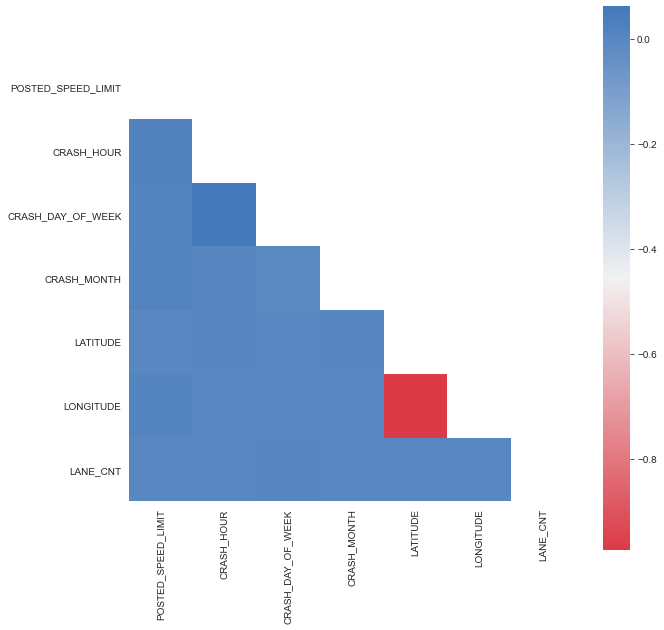

In [34]:
corr = crash_clean.corr()
mask = np.triu(np.ones_like(corr,dtype = np.bool))
sns.set_style(style = 'white')
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(10,250,as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap,
           square = True
           )

In [35]:
crash_clean

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,TRAFFICWAY_TYPE,LANE_CNT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),ONE-WAY,NaN
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),NOT DIVIDED,4.0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),FOUR WAY,NaN
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,30,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),DIVIDED - W/MEDIAN (NOT RAISED),NaN
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,20,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,14,4,7,NaN,NaN,NaN,DRIVEWAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517277,8177e1b192fa48f2031a46b96f36de00cf134a897106c7...,05/26/2021 03:29:00 PM,10,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,15,4,5,41.696314,-87.596632,POINT (-87.596632243933 41.696313683973),PARKING LOT,NaN
517278,b97a293c86c5720620b2c993ff91e46c90e129283ce883...,05/26/2021 08:54:00 PM,20,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,20,4,5,41.918463,-87.650799,POINT (-87.650799033359 41.918462595697),ALLEY,NaN
517279,c071056bc7969311010acb313722c4a2090c5be655b7ed...,05/26/2021 04:16:00 AM,20,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,4,4,5,41.778846,-87.686224,POINT (-87.686224330667 41.778846489565),ONE-WAY,NaN
517280,ce5ecae9555f96005905f51818101855eb30b626d49464...,05/26/2021 12:45:00 PM,30,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,12,4,5,41.784840,-87.664204,POINT (-87.664204193636 41.784840316339),T-INTERSECTION,NaN


In [36]:
crash_clean.isnull().sum()

CRASH_RECORD_ID                 0
CRASH_DATE                      0
POSTED_SPEED_LIMIT              0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
STREET_DIRECTION                3
BEAT_OF_OCCURRENCE              0
WORK_ZONE_I                     0
MOST_SEVERE_INJURY              0
INJURIES_TOTAL                  0
INJURIES_FATAL                  0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     2900
LONGITUDE                    2900
LOCATION                     2900
TRAFFICWAY_TYPE                 0
LANE_CNT                   318316
dtype: int64

In [37]:
crash_clean.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'TRAFFICWAY_TYPE',
       'LANE_CNT'],
      dtype='object')

In [38]:
dum_clean_crash= pd.get_dummies(crash_clean,columns = ['POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH','TRAFFICWAY_TYPE',
       'LANE_CNT'],drop_first = True )

In [39]:
dum_clean_crash

,CRASH_RECORD_ID,CRASH_DATE,LATITUDE,LONGITUDE,LOCATION,POSTED_SPEED_LIMIT_1,POSTED_SPEED_LIMIT_2,POSTED_SPEED_LIMIT_3,POSTED_SPEED_LIMIT_4,POSTED_SPEED_LIMIT_5,...,LANE_CNT_60.0,LANE_CNT_80.0,LANE_CNT_99.0,LANE_CNT_100.0,LANE_CNT_400.0,LANE_CNT_902.0,LANE_CNT_218474.0,LANE_CNT_299679.0,LANE_CNT_433634.0,LANE_CNT_1191625.0
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517277,8177e1b192fa48f2031a46b96f36de00cf134a897106c7...,05/26/2021 03:29:00 PM,41.696314,-87.596632,POINT (-87.596632243933 41.696313683973),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
517278,b97a293c86c5720620b2c993ff91e46c90e129283ce883...,05/26/2021 08:54:00 PM,41.918463,-87.650799,POINT (-87.650799033359 41.918462595697),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
517279,c071056bc7969311010acb313722c4a2090c5be655b7ed...,05/26/2021 04:16:00 AM,41.778846,-87.686224,POINT (-87.686224330667 41.778846489565),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
517280,ce5ecae9555f96005905f51818101855eb30b626d49464...,05/26/2021 12:45:00 PM,41.784840,-87.664204,POINT (-87.664204193636 41.784840316339),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17838/733845878.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype = np.bool))


<AxesSubplot:>

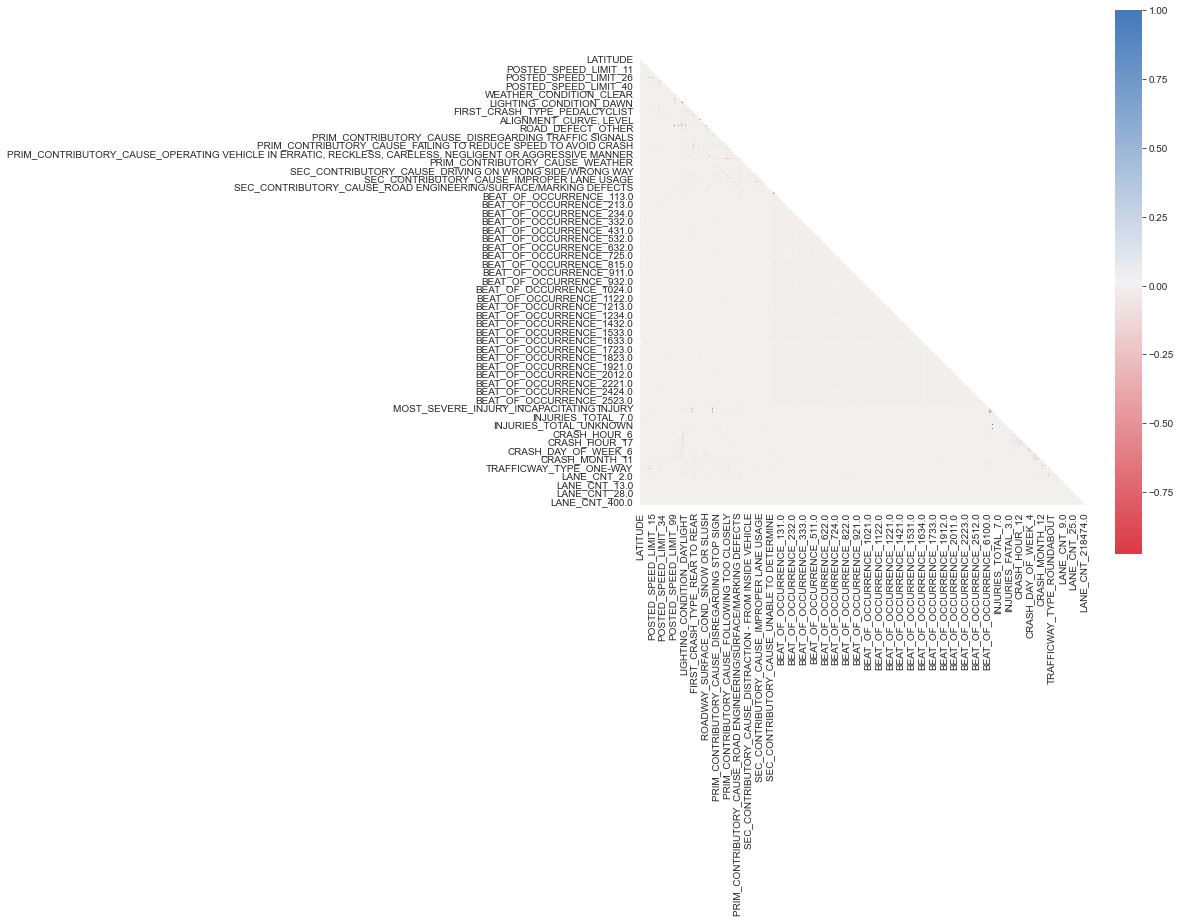

In [40]:
corr = dum_clean_crash.corr()
mask = np.triu(np.ones_like(corr,dtype = np.bool))
sns.set_style(style = 'white')
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(10,250,as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap,
           square = True
           )

In [41]:
crash_clean.to_csv('crash_clean.csv')